In [50]:
from ViolaJones import ViolaJones
import pickle
import numpy as np
import time
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.color import rgb2gray, rgb2hsv
import cv2
import commonfunctions as cf
from haar_utils import *
import util as util
from haar_utils import *
import imutils


In [51]:
# test(ViolaJones.load("cvj_weights_data_set_2_0_3000_5000_53001_40.pkl"))


## Testing on some images


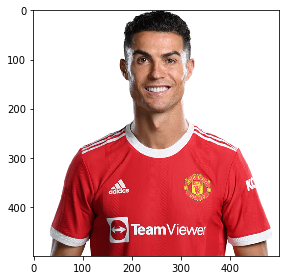

In [52]:
# reading the image and prprocess it
img1 = io.imread("./images/cr7.png")
io.imshow(img1)


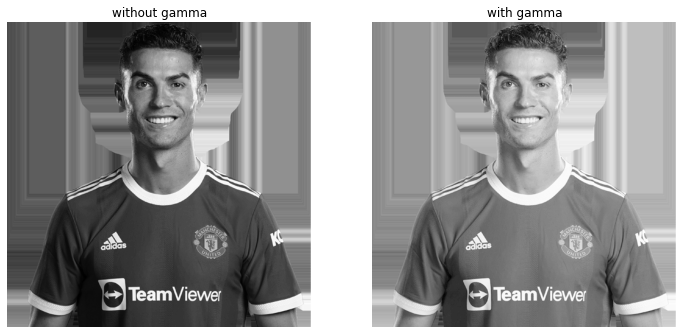

In [53]:
img1_greyscale = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) / 255
img1_greyscale_enhanced = (util.gamma(img1_greyscale) * 255).astype(np.uint8)
cf.show_images(
    [img1_greyscale, img1_greyscale_enhanced],
    ["without gamma", "with gamma"],
)

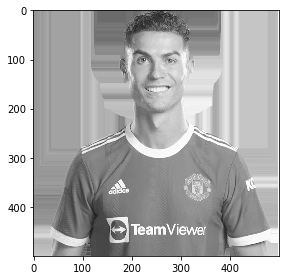

In [54]:
final_image1 = img1_greyscale_enhanced
io.imshow(final_image1)


In [55]:
window_size = 19
half_window = window_size // 2
# loading the viola-jones
clf_test = ViolaJones.load("cvj_weights_data_set_2_0_3000_5000_53001_40.pkl")
clf_test.clfs


In [56]:
all_possible_faces1 = util.get_faces_in_multiple_scales(
    final_image1, clf_test, half_window, 4
)

print(f"Found {len(all_possible_faces1)} candidates")

Found 191 candidates


In [57]:
face_positions_suppressed1 = util.non_maximum_supression_multiscale(
    all_possible_faces1, threshold=0.1
)

print(len(face_positions_suppressed1))


8


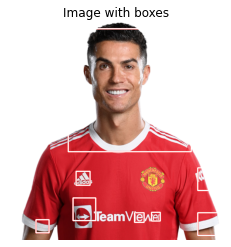

In [58]:
lbl = "Image with boxes"
cf.show_images(
    [
        util.render_boxes(img1, face_positions_suppressed1),
    ],
    [lbl],
)
